# Solar Radiation

© Dimitrios Theodorakis GNU General Public License v3.0 https://github.com/DimitriosAstro/Astronomy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

### AIM - Visualise the blackbody radiation from different temperature suns and calculate the effective temperature of planets.

**Predict**

Have a think about these questions and make some predictions! Be sure to tell someone else what you predict.

1) Do hotter objects emit more longer or shorter wavelengths?  
2) What colour light does our sun emit the most of?

# Let's go: The Multi-Wavelength Sun

We can approximate the sun as a black body (an object that absorbs and emits radiation at all frequencies). 
The sun emits black-body radiation. This is radiation of all frequencies in the electromagnetic spectrum.
It doesn't emit the same amount of radiation for each frequency though - we know this because hot stars look blue and cooler stars red.
Each black body has a peak of its radiation curve - this peak tells us what frequency of radiation is emitted the most.

Let's visualise the black-body radiation from the sun:

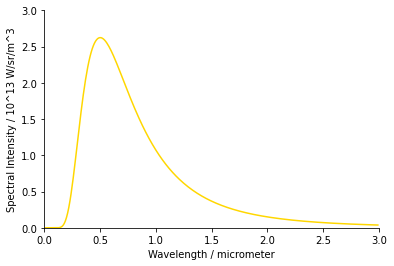

In [2]:
T = 5772 # K
kb = 1.380649*10**(-23) # J/K
c = 299792458 # m/s
h = 6.62607015*10**(-34) # Js

l = np.arange(0.01,3,0.01)
# l in in micrometres, convert it to metres
# then create an Array, B, of zeros the same length of l
# Your code here:
l = l*10**(-6)
B = np.zeros(len(l))

for i in range(len(l)):
    B[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*T))-1)

fig = plt.figure(2)
ax = plt.subplot(xlim=(0,3),ylim=(0,3))
ax.plot(l*10**6, B/10**13, c="gold")
ax.set_xlabel("Wavelength / micrometer")
ax.set_ylabel("Spectral Intensity / 10^13 W/sr/m^3")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

You can see a shift to higher intensity and lower wavelength (higher energy) radiation for higher temperature curves.
The peak wavelength shown on the graph can be calculated using Wein's Law:

$\lambda_{peak} = \frac{b}{T}$

where $b = 2.897771955\times10^{-3}\ mK$.  
Let's calculate the lambda+peak for our sun and check the graph is correct:

In [4]:
b = 2.897771955*10**(-3) # m K
# use Wein's law to calculate the peak wavelength of the sun, what colour is this?
# Your code here:
lp = b/T

print("The peak wavelength is : {:.0f} nm".format(lp*10**9))

The peak wavelength is : 502 nm


502 nm just as expected! But wait, this is a wavlength of green blue not yellow like our sun is.  
Don't forget the sun radiates other wavelengths as well. The longer tail on the right of the graph to the redder wavelengths means even though the peak wavelength is green overall the sun looks yellow.

Before we move on to get more images let's look at the Stefan-Boltzmann Law.  
We saw in the last graph that hotter stars radiate more and are therefore more luminous. But by how much?
The Stefan-Boltzmann Law relates a star's temperature and radius to it's luminosity (the amount of energy emitted per second usually):

$L = 4\pi R^2\sigma T_{e}^{4}$

Here sigma is the Stefan-Boltzman constant and $T_{e}$ is the effective temperature. Te is the temperature of a blackbody that would emit the same amount of radiation as the object or star.  
Let's calculate the luminosity of the sun using this law:

In [5]:
sigma = 5.670374419*10**(-8) # W m^-2 K^-4
R = 6.957*10**8 # m
# use Stefan-Boltzman's law above to calculate the luminosity of the sun
# Your code here:
Lsun = 4*np.pi*R**2*sigma*T**4

print("The Luminosity of the sun is : {:.2e} W".format(Lsun))

The Luminosity of the sun is : 3.83e+26 W


We get very close to the accepted value of $3.828\times10^{26}\ W$.
https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

Of course the sun is not a perfect black body which we have assumed throughout this section.
If were to plot observational data for the sun on our graph from earlier it would follow the gold curve but with dips and spikes.
These are atomic absorption and emissions lines which we will look at in a future Notebook.

# Warming the Planets

The sun's radiation warms the planets. If we approximate the planets also as black bodies we can calculate their equilibrium temperature.
This is the temperature a planet would be from just solar heating by absorbing all incident solar radiation and emitting it all as well (remember blackbodies emit and absorb radiation perfectly).
The equilibrium temperature is achieved when the absorbed radiation is equal to the emitted radiation of the planet (gaining energy from radiation as fast as it is loosing it).
The power the planet recieves is:

$P_{in} = L_{\odot}(1-a)(\frac{\pi R_{p}^{2}}{4\pi D^2})$

$P_{in} = 4\pi R_{\odot}^{2}\sigma T_{\odot}^{4}(1-a)(\frac{\pi R_{p}^{2}}{4\pi D^2})$

This is the luminosity of the sun times the fraction of light that is absorbed by the planet $(1-a)$. The final term is the area of the planet divided by the area of the sphere whos radius is the distance of the planet to the sun. It's essentially the amount of sunlight that reaches the planet since the radiation spreads out after leaving the solar surface according to the inverse square law.

The power radiated from the planet is found using the stefan boltzmann law, $P_{out} = 4\pi R_p^2\sigma T_{p}^{4}$.
Equating $P_{in}$ and $P_{out}$ we get:

$T_{p} = T_{\odot}(1-a)^{\frac{1}{4}}\sqrt{\frac{R_{\odot}}{2D}}$

Here a is the albedo of the planet which is how much incident radiation is reflected back into space and not absorbed.
Objects with icier or whiter surfaces have a higher albedo since ice and white objects reflect more light than darker objects.

In [6]:
aEarth = 0.306
Tsun = T
Rsun = R
AU = 149597870700 # m
KtodegC = 273.15
degSymb = '\u00b0'

dEarth = 1 * AU
# use the equation above to calculate the effective temperature of the Earth
# Your code here:
TeqEarth = Tsun*(1-aEarth)**0.25*np.sqrt(Rsun/2/dEarth)

print("The Equilibrium Tmperature of the Earth is: {:.0f} K".format(TeqEarth))
print("The Equilibrium Tmperature of the Earth is: {:.0f} {}C".format(TeqEarth-KtodegC,degSymb))

The Equilibrium Tmperature of the Earth is: 254 K
The Equilibrium Tmperature of the Earth is: -19 °C


Wow chilly! This temperature doesn't take into account internal planetary heating or the greenhouse effect so it is lower than expected.

# Challenge

 1) Recreate my blackbody curve image  
 2) Plot the actual solar spectrum using data from https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa.ncdc:C00899  
    You will get something like this: https://en.wikipedia.org/wiki/File:EffectiveTemperature_300dpi_e.png  
 3) Calculate the temperature at Mars, Venus, and Jupiter like we did for the Earth  
    How do the values compare with the actual average surface temperatures?

# References and Resources

Mihos, C. (2020) Stars and Planets, Url: http://burro.case.edu/Academics/Astr221/SolarSys/equiltemp.html

# Interactives

Use these interactives to see how changing multiple variables alters the outcome.

## Wien's Law

The slider changes the Temperature of the star in K

In [7]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(T=(1,10000))
def weins(T):
    b = 2.897771955*10**(-3) # m K
    lp = b/T
    print("The peak wavelength for temp {:.0f} K is : {:.0f} nm".format(T, lp*10**9))

interactive(children=(IntSlider(value=5000, description='T', max=10000, min=1), Output()), _dom_classes=('widg…

## Luminosity using Stefan-Boltzman's Law

The first slider Rsol changes the radius of the star in units of solar radii.  
The second slider changes the temperature of the star in K.

In [8]:
@interact(Rsol=(0.5,30,0.1),Temp=(2500,10000,1))
def lumin(Rsol,Temp):
    sigma = 5.670374419*10**(-8) # W m^-2 K^-4
    Tsun = 5772 # K
    Rsun = 6.957*10**8 # m
    R = Rsun*Rsol
    T = Temp
    Lstar = 4*np.pi*R**2*sigma*T**4
    Lsun = 4*np.pi*Rsun**2*sigma*Tsun**4
    ratio = Lstar/Lsun
    print("The Luminosity of the star is : {:.2e} W or {:.2f} times that of the sun".format(Lsun,ratio))

interactive(children=(FloatSlider(value=15.200000000000001, description='Rsol', max=30.0, min=0.5), IntSlider(…

# Equilibrium Temperature

a is the albedo of the body.  
dist is the distance the body is from its star in AU.  
Tstar is the temperature of the star in K.  
Rstar is the radius of the star in solar radii.

In [9]:
@interact(a=(0,1,0.1),dist=(0.1,50,0.1),Tstar=(2500,10000,1),Rstar=(0.5,30,0.1))
def eqT(a, dist, Tstar, Rstar):
    Rsun = 6.957*10**8 # m
    R = Rstar*Rsun
    AU = 149597870700 # m
    KtodegC = 273.15
    degSymb = '\u00b0'
    d = dist * AU
    eqT = Tstar*(1-a)**0.25*np.sqrt(R/2/d)
    print("The Equilibrium Temperature of this body is: {:.0f} K or {:.0f} {}C".format(eqT, eqT-KtodegC,degSymb))

interactive(children=(FloatSlider(value=0.0, description='a', max=1.0), FloatSlider(value=25.000000000000004, …

## Blackbody Curves

Here the slider is changing the temperature of the blackbody.  
Notice that the y axis is set to scale based on the max intensity value for the current temp.

In [10]:
from ipywidgets import FloatSlider

def blackBody(T):
    kb = 1.380649*10**(-23) # J/K
    c = 299792458 # m/s
    h = 6.62607015*10**(-34) # Js
    
    l = np.arange(0.01,4,0.01)*10**(-6)
    B = np.zeros(len(l))

    for i in range(len(l)):
        B[i] = 2*h*c**2/l[i]**5 * 1/(np.exp(h*c/(l[i]*kb*T))-1)

    fig = plt.figure(num=3,figsize=(15,10))
    ax = plt.subplot(xlim=(0,3),ylim=(0,np.floor(max(B)/10**13+1)))
    ax.plot(l*10**6, B/10**13, c="gold")
    ax.set_xlabel("Wavelength / micrometer")
    ax.set_ylabel("Spectral Intensity / 10^13 W/sr/m^3")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.show()

interactive_plot = interactive(blackBody, T=FloatSlider(min=2500,max=10000,step=1,continuous_update=False))
interactive_plot

interactive(children=(FloatSlider(value=2500.0, continuous_update=False, description='T', max=10000.0, min=250…

In [14]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p numpy,matplotlib,IPython,watermark 

# date
print (" ")
%watermark -u -n -t -z



The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
matplotlib: 3.3.4
IPython   : 7.22.0
watermark : 2.2.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

 
Last updated: Thu Sep 16 2021 10:12:00GMT Summer Time

